# KFERQ motifs analysis
----

Mathieu Bourdenx - October 2020

[Github](https://github.com/MathieuBo)

---
### Description
This script takes as input a .csv file exported from the KFERQ finder website.

It will perform quantification of the % of KFERQ motifs according to 4 methods: 
* **Method 1:** Only canonical motifs are considered. 
* **Method 2:** Canonical and PTM-generated (phospho. and acetyl.) are considered. One canonical is enough to be classified as canonical.
* **Method 3:** Canonical and PTM-generated (phospho. and acetyl.) are considered. One canonical is enough to be classified as canonical. Phosphorylation-generated motifs have priority over acetylated-generated (i.e. a single phospho. motifs is enough to be classified as phospho.).
* **Method 4:** Canonical and PTM-generated (phospho. and acetyl.) are considered. One canonical is enough to be classified as canonical. Acetylation-generated motifs have priority over phosphorylation-generated (i.e. a single acetyl. motifs is enough to be classified as acetyl.).

By default, the "other kind of motifs" *are not considered*. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Define colors for each kind of motif

color_dict = dict()
color_dict['No motif'] = 'gray'
color_dict['Canonical'] = '#EEEE00'
color_dict['Phospho.'] = '#009ACD'
color_dict['Acetyl.'] = '#66CD00'
color_dict['PTM'] = 'teal'

## Load data

In [4]:
# Load data
data = pd.read_csv('./Data/example.csv')

In [5]:
# Check that data were loaded correctly
data.head()

,entry,status,protein_names,gene_names,length,motif,motif_start,motif_type
0,Q9Z2I8,reviewed,Succinate--CoA ligase [GDP-forming] subunit be...,Suclg2,433,KLLRE,13.0,acetyl. act.
1,Q9Z2I8,reviewed,Succinate--CoA ligase [GDP-forming] subunit be...,Suclg2,433,QSKKL,45.0,phos. act.
2,Q9Z2I8,reviewed,Succinate--CoA ligase [GDP-forming] subunit be...,Suclg2,433,IFKEQ,189.0,canonical
3,Q9Z2I8,reviewed,Succinate--CoA ligase [GDP-forming] subunit be...,Suclg2,433,QITKL,225.0,phos. act.
4,Q9Z2I8,reviewed,Succinate--CoA ligase [GDP-forming] subunit be...,Suclg2,433,QKDIF,271.0,canonical


## Prepare the data

In [6]:
# Count the number of motif type per protein 

counted_data = data.groupby(['entry','motif_type']).size().to_frame('count').reset_index()
counted_data = counted_data.pivot(index='entry', columns='motif_type', values='count')
counted_data.columns = counted_data.columns.to_list()

## Analyze motifs

In [8]:
# Function to quantify the number of motifs according to 4 methods
# Needs to be run only once

def quantify_group(df):

    for i in df.index:

        if df.loc[i, 'no motif'] >= 1 or df.loc[i, 'other types of motifs'] >= 1:
            
            df.loc[i, 'Method1'] = 'No motif'
            df.loc[i, 'Method2'] = 'No motif'
            df.loc[i, 'Method3'] = 'No motif'
            df.loc[i, 'Method4'] = 'No motif'
            
        elif df.loc[i, 'canonical'] >= 1:
            
            df.loc[i, 'Method1'] = 'Canonical'
            df.loc[i, 'Method2'] = 'Canonical'
            df.loc[i, 'Method3'] = 'Canonical'
            df.loc[i, 'Method4'] = 'Canonical'
            
        else:
            
            if df.loc[i, 'phos. act.'] >= 1:
                
                df.loc[i, 'Method1'] = 'No motif'
                df.loc[i, 'Method2'] = 'PTM'
                df.loc[i, 'Method3'] = 'Phospho.'
                
            elif df.loc[i, 'acetyl. act.'] >= 1:
                
                df.loc[i, 'Method1'] = 'No motif'
                df.loc[i, 'Method2'] = 'PTM'
                df.loc[i, 'Method3'] = 'Acetyl.'
             
            if df.loc[i, 'acetyl. act.'] >= 1:
                
                df.loc[i, 'Method4'] = 'Acetyl.'
                
            elif df.loc[i, 'phos. act.'] >= 1:
                
                df.loc[i, 'Method4'] = 'Phospho.'
    
    df.to_excel('./Output/KFERQ_analysis_export.xlsx')

In [10]:
# Perform the quantification

quantify_group(counted_data)

## Plotting

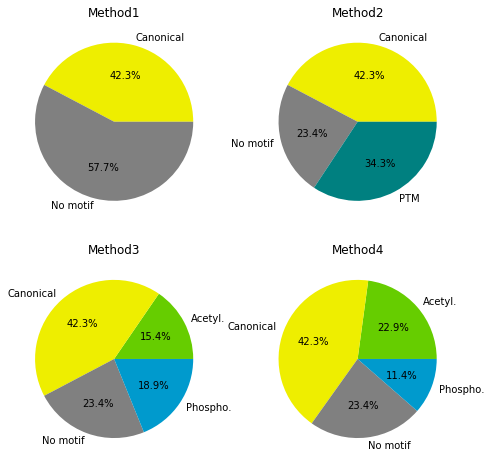

In [11]:
plt.figure(figsize=(8,8))

for i,method in enumerate(['Method1', 'Method2', 'Method3', 'Method4']):
    
    motif_type, counts = np.unique(counted_data[method], return_counts=True)
    counts_percent = counts / np.sum(counts) * 100
    
    plt.subplot(2,2,i+1)
    plt.pie(x=counts_percent, labels=motif_type, autopct='%1.1f%%', colors=[color_dict[i] for i in motif_type])
    plt.title(method)
    #ax.axis('equal')

plt.savefig('./Output/analysis.png', dpi=300)
plt.show()